# <center><font color = 'green '> Pubg Game Prediction </font></center>

<center> <img src='https://media.giphy.com/media/xd2c44rUajkHnxpywZ/giphy-downsized-large.gif'></center>

### importing libraries <a class= 'anchor' id = 'import'></a>

In [5]:
# standard libraries 
import numpy as np 
import pandas as pd 
# visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['figure.figsize']=(16,6)
import seaborn as sns

# handling warning 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#!pip install catboost
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### reading data <a class= 'anchor' id= 'read'></a>

In [6]:
# Loading the dataset
df= pd.read_csv('train_V2.csv')

In [9]:
# show top 5 data
df.head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [10]:
# data dimension
df.shape

(4446966, 29)

In [12]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

# Data description
1. DBNOs - Number of enemy players knocked.
2. assists - Number of enemy players this player damaged that were killed by teammates.
3. boosts - Number of boost items used.
4. damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
5. headshotKills - Number of enemy players killed with headshots.
6. heals - Number of healing items used.
7. Id - Player’s Id
8. killPlace - Ranking in match of number of enemy players killed.
9. killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10. killStreaks - Max number of enemy players killed in a short amount of time.
11. kills - Number of enemy players killed.
12. longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
13. matchDuration - Duration of match in seconds.
14. matchId - ID to identify match. There are no matches that are in both the training and testing set.
15. matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16. rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
17. revives - Number of times this player revived teammates.
18. rideDistance - Total distance traveled in vehicles measured in meters.
19. roadKills - Number of kills while in a vehicle.
20. swimDistance - Total distance traveled by swimming measured in meters.
21. teamKills - Number of times this player killed a teammate.
22. vehicleDestroys - Number of vehicles destroyed.
23. walkDistance - Total distance traveled on foot measured in meters.-
24. weaponsAcquired - Number of weapons picked up.
25. winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. numGroups - Number of groups we have data for in the match.
28. maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
28. winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


# Data wrangling 

In [15]:
# check row with null value win place perc
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [16]:
# remove that row 
df.drop(2744604, inplace = True)

## understanding player distribution in game


In [17]:
df['playerjoined']=df.groupby('matchId')['matchId'].transform('count')

In [18]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


<AxesSubplot:xlabel='playerjoined', ylabel='count'>

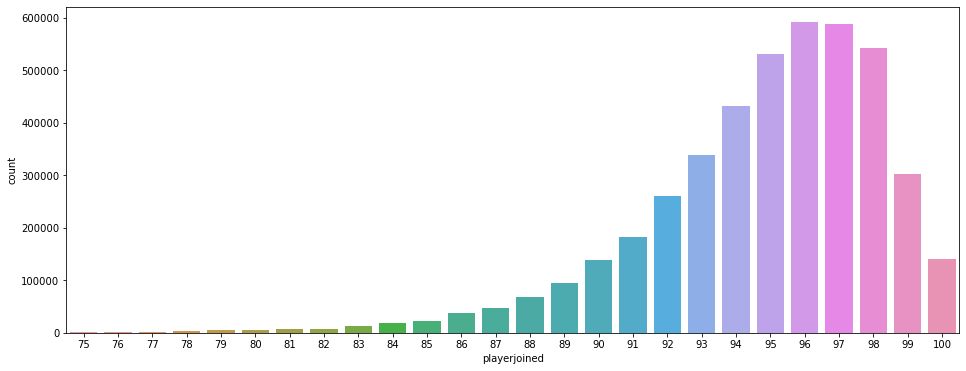

In [21]:
sns.countplot(df[df['playerjoined']>=75]['playerjoined'])

## analysis the data


### kills without moving?

In [23]:
# prepare a data parameter to gather the information of the total distance travelled
df['totaldistance']=df['walkDistance'] + df['rideDistance'] + df['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
df['killwithoutmoving']=((df['kills']>0) & (df['totaldistance']==0))

In [24]:
df[df['killwithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [25]:
df[df['killwithoutmoving']==True].shape

(1535, 32)

In [27]:
# drop the table 
df.drop(df[df['killwithoutmoving'] == True].index , inplace = True)

### extra ordinary road kills?

In [28]:
df[df['roadKills']>=5].shape

(82, 32)

In [30]:
df.drop(df[df['roadKills']>=5].index , inplace= True)

## how many killls ?

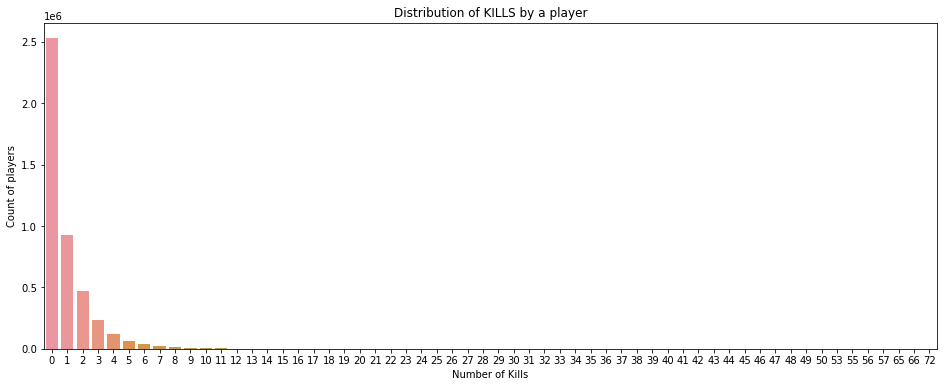

In [31]:
sns.countplot(data = df, x = df['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

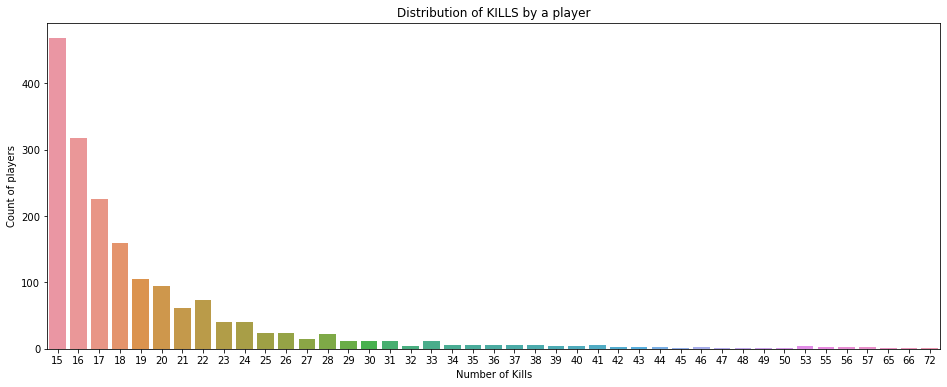

In [32]:
sns.countplot(df[df['kills']>=15]['kills']).set_title("Distribution of KILLS by a player")
plt.ylabel("Count of players")
plt.xlabel("Number of Kills")
plt.show()

In [33]:
# data dimension
df[df['kills'] > 20].shape

(417, 32)

In [34]:
# drop the instances
df.drop(df[df['kills'] > 20].index, inplace = True)

## Head shot

In [35]:

df['headshot_rate'] = df['headshotKills']/df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

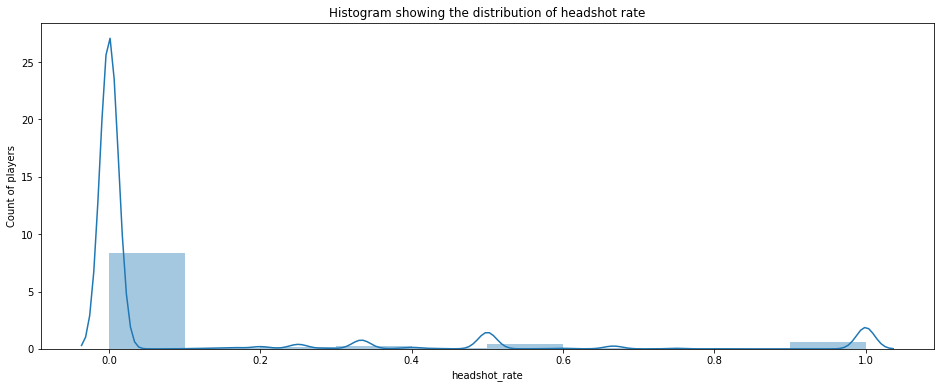

In [36]:
# plot the headshot rate distribution
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [37]:
df[(df['headshot_rate']==1) & (df['kills']>5)].shape

(187, 33)

In [38]:
df.drop(df[(df['headshot_rate']==1) & (df['kills']>5)].index , inplace= True)

## Longest kills 

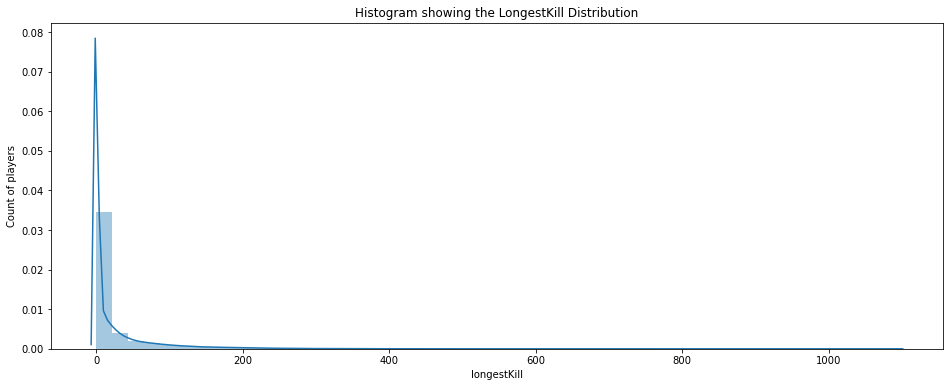

In [39]:
sns.distplot(df['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

In [40]:
df[df['longestKill']>=500].shape

(1738, 33)

In [41]:
df.drop(df[df['longestKill']>=500].index , inplace = True)

## weapon change 

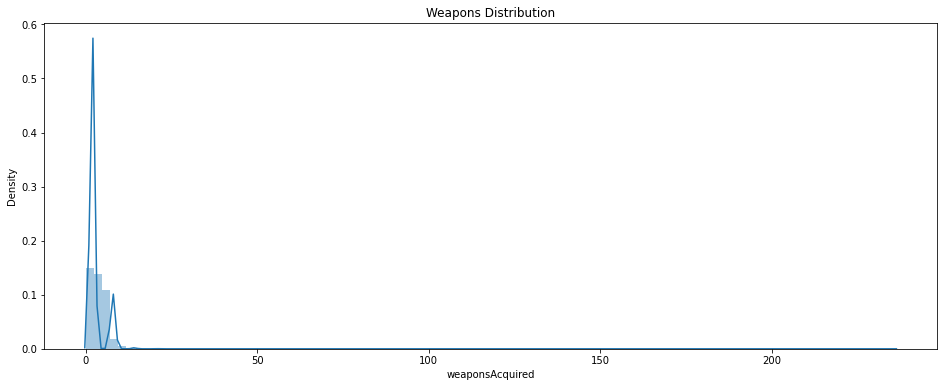

In [42]:
sns.distplot(df['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [43]:
df[df['weaponsAcquired']>=15].shape


(6809, 33)

In [44]:
df.drop(df[df['weaponsAcquired']>=15].index, inplace = True)

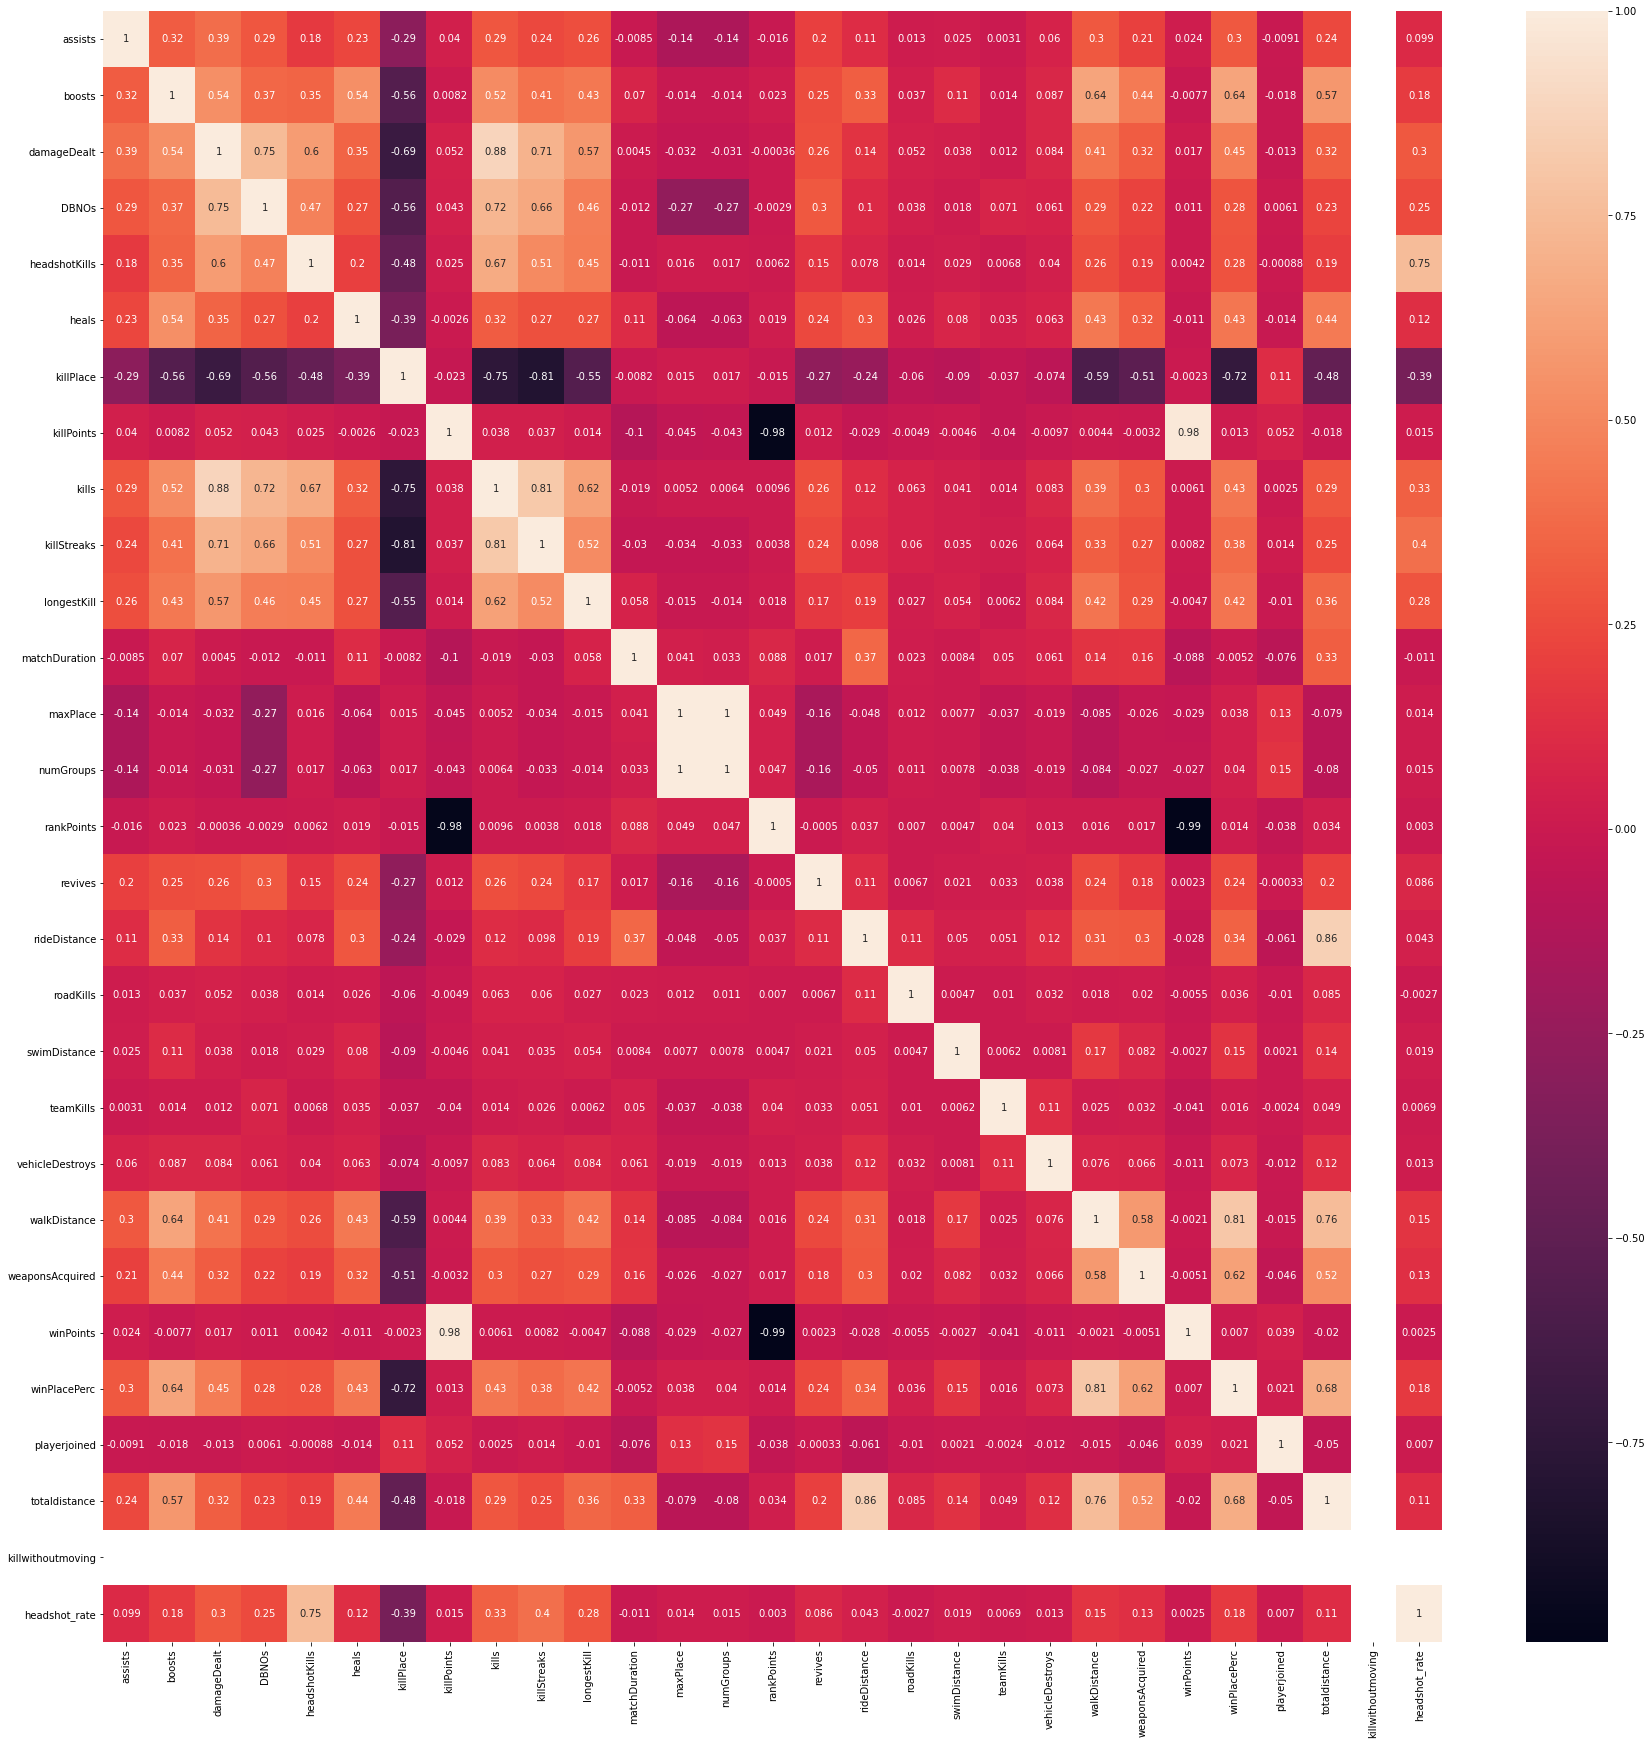

In [45]:
# correlation of parameter with Win Prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(), annot = True)
plt.show()

# Feature engineering

In [48]:
normalising_factor= (100 - df['playerjoined']/100)+1

In [49]:
df['killsNorm'] = df['kills'] * normalising_factor
df['damageDealtNorm'] = df['damageDealt'] * normalising_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalising_factor
df['matchDurationNorm'] = df['matchDuration'] * normalising_factor


df['traveldistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [50]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [51]:
data = df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance', 
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [52]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totaldistance,killwithoutmoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


# ML - catboost

## handling catagorical data 

In [53]:
x= data.drop(['winPlacePerc'], axis=1)
y= data['winPlacePerc']

In [55]:
x = pd.get_dummies(x, columns = ['matchType', 'killwithoutmoving'])

In [56]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killwithoutmoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [58]:
x.shape

(4436197, 40)

In [59]:
features= x.columns

## scaling the data

In [62]:
sc = StandardScaler()
sc.fit(x)
x= pd.DataFrame(sc.transform(x))


In [63]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582943,-0.384165,0.449314,1.172488,-0.765159,-0.459623,-0.732883,-1.212387,-0.050059,-0.142505,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206512,-0.370797,-0.405065,1.236173,0.0
1,-0.582943,-0.384165,0.340022,-0.804730,-0.765159,-0.459623,-0.775856,0.803567,-0.050059,-0.142505,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206512,-0.370797,-0.405065,1.236173,0.0
2,-0.582943,-0.384165,-0.024286,-0.804730,-0.765159,-0.459623,0.169558,0.813070,-0.050059,-0.142505,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206512,-0.370797,-0.405065,-0.808948,0.0
3,-0.582943,-0.384165,0.995776,-0.804730,-0.765159,-0.459623,-0.560989,0.700393,-0.050059,-0.142505,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206512,-0.370797,-0.405065,1.236173,0.0
4,-0.582943,-0.384165,-0.097147,-0.804730,0.647830,0.727499,2.232281,0.906740,-0.050059,-0.142505,...,-0.033601,-0.005244,-0.013803,-0.008292,-0.054365,-0.206512,2.696890,-0.405065,-0.808948,0.0


## spliting the data 

In [64]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [65]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(3105337, 40) (3105337,)
(1330860, 40) (1330860,)


## catboost 

In [66]:
import catboost as cb

In [67]:
train_dataset= cb.Pool(xtrain, ytrain)
test_dataset= cb.Pool(xtest, ytest)

In [68]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [69]:
#grid search 
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5481719	test: 0.5481679	best: 0.5481679 (0)	total: 457ms	remaining: 45.3s
1:	learn: 0.5333200	test: 0.5333227	best: 0.5333227 (1)	total: 803ms	remaining: 39.3s
2:	learn: 0.5189506	test: 0.5189574	best: 0.5189574 (2)	total: 1.09s	remaining: 35.2s
3:	learn: 0.5050260	test: 0.5050358	best: 0.5050358 (3)	total: 1.38s	remaining: 33s
4:	learn: 0.4915818	test: 0.4915976	best: 0.4915976 (4)	total: 1.69s	remaining: 32.2s
5:	learn: 0.4785634	test: 0.4785881	best: 0.4785881 (5)	total: 1.98s	remaining: 31s
6:	learn: 0.4659821	test: 0.4660141	best: 0.4660141 (6)	total: 2.27s	remaining: 30.1s
7:	learn: 0.4537832	test: 0.4538185	best: 0.4538185 (7)	total: 2.55s	remaining: 29.4s
8:	learn: 0.4419665	test: 0.4420043	best: 0.4420043 (8)	total: 2.86s	remaining: 28.9s
9:	learn: 0.4305202	test: 0.4305614	best: 0.4305614 (9)	total: 3.15s	remaining: 28.4s
10:	learn: 0.4195105	test: 0.4195591	best: 0.4195591 (10)	total: 3.43s	remaining: 27.8s
11:	learn: 0.4088452	test: 0.4089024	best: 0.4089024 (11

94:	learn: 0.1399354	test: 0.1403576	best: 0.1403576 (94)	total: 30.3s	remaining: 1.6s
95:	learn: 0.1394991	test: 0.1399214	best: 0.1399214 (95)	total: 30.6s	remaining: 1.28s
96:	learn: 0.1391192	test: 0.1395426	best: 0.1395426 (96)	total: 30.9s	remaining: 957ms
97:	learn: 0.1387504	test: 0.1391776	best: 0.1391776 (97)	total: 31.2s	remaining: 637ms
98:	learn: 0.1383897	test: 0.1388184	best: 0.1388184 (98)	total: 31.5s	remaining: 318ms
99:	learn: 0.1380510	test: 0.1384816	best: 0.1384816 (99)	total: 31.8s	remaining: 0us

bestTest = 0.1384816425
bestIteration = 99

0:	loss: 0.1384816	best: 0.1384816 (0)	total: 35.5s	remaining: 8m 52s
0:	learn: 0.5125377	test: 0.5125356	best: 0.5125356 (0)	total: 304ms	remaining: 30.1s
1:	learn: 0.4669938	test: 0.4670154	best: 0.4670154 (1)	total: 602ms	remaining: 29.5s
2:	learn: 0.4265114	test: 0.4265525	best: 0.4265525 (2)	total: 888ms	remaining: 28.7s
3:	learn: 0.3903140	test: 0.3903725	best: 0.3903725 (3)	total: 1.17s	remaining: 28.1s
4:	learn: 0.3583

87:	learn: 0.1174880	test: 0.1179277	best: 0.1179277 (87)	total: 25.9s	remaining: 3.53s
88:	learn: 0.1173966	test: 0.1178360	best: 0.1178360 (88)	total: 26.2s	remaining: 3.24s
89:	learn: 0.1173013	test: 0.1177401	best: 0.1177401 (89)	total: 26.5s	remaining: 2.94s
90:	learn: 0.1171973	test: 0.1176350	best: 0.1176350 (90)	total: 26.7s	remaining: 2.64s
91:	learn: 0.1170944	test: 0.1175326	best: 0.1175326 (91)	total: 27.1s	remaining: 2.36s
92:	learn: 0.1170148	test: 0.1174528	best: 0.1174528 (92)	total: 27.5s	remaining: 2.07s
93:	learn: 0.1166135	test: 0.1170486	best: 0.1170486 (93)	total: 27.8s	remaining: 1.77s
94:	learn: 0.1164829	test: 0.1169174	best: 0.1169174 (94)	total: 28.1s	remaining: 1.48s
95:	learn: 0.1164067	test: 0.1168425	best: 0.1168425 (95)	total: 28.4s	remaining: 1.18s
96:	learn: 0.1163266	test: 0.1167640	best: 0.1167640 (96)	total: 28.7s	remaining: 887ms
97:	learn: 0.1162250	test: 0.1166609	best: 0.1166609 (97)	total: 29s	remaining: 591ms
98:	learn: 0.1161524	test: 0.11658

80:	learn: 0.1474200	test: 0.1478084	best: 0.1478084 (80)	total: 30.2s	remaining: 25.8s
81:	learn: 0.1467677	test: 0.1471588	best: 0.1471588 (81)	total: 30.6s	remaining: 25.4s
82:	learn: 0.1460894	test: 0.1464827	best: 0.1464827 (82)	total: 30.9s	remaining: 25s
83:	learn: 0.1454914	test: 0.1458887	best: 0.1458887 (83)	total: 31.3s	remaining: 24.6s
84:	learn: 0.1449082	test: 0.1453091	best: 0.1453091 (84)	total: 31.7s	remaining: 24.2s
85:	learn: 0.1443425	test: 0.1447455	best: 0.1447455 (85)	total: 32s	remaining: 23.8s
86:	learn: 0.1437245	test: 0.1441293	best: 0.1441293 (86)	total: 32.3s	remaining: 23.4s
87:	learn: 0.1432060	test: 0.1436127	best: 0.1436127 (87)	total: 32.8s	remaining: 23.1s
88:	learn: 0.1427165	test: 0.1431272	best: 0.1431272 (88)	total: 33.1s	remaining: 22.7s
89:	learn: 0.1422323	test: 0.1426462	best: 0.1426462 (89)	total: 33.4s	remaining: 22.3s
90:	learn: 0.1417105	test: 0.1421255	best: 0.1421255 (90)	total: 33.7s	remaining: 21.8s
91:	learn: 0.1412477	test: 0.1416649

22:	learn: 0.1487972	test: 0.1491822	best: 0.1491822 (22)	total: 7.82s	remaining: 43.2s
23:	learn: 0.1463209	test: 0.1467094	best: 0.1467094 (23)	total: 8.13s	remaining: 42.7s
24:	learn: 0.1442569	test: 0.1446577	best: 0.1446577 (24)	total: 8.43s	remaining: 42.1s
25:	learn: 0.1424830	test: 0.1428875	best: 0.1428875 (25)	total: 8.73s	remaining: 41.6s
26:	learn: 0.1409930	test: 0.1414083	best: 0.1414083 (26)	total: 9.05s	remaining: 41.2s
27:	learn: 0.1394364	test: 0.1398535	best: 0.1398535 (27)	total: 9.39s	remaining: 40.9s
28:	learn: 0.1382288	test: 0.1386492	best: 0.1386492 (28)	total: 9.73s	remaining: 40.6s
29:	learn: 0.1371297	test: 0.1375547	best: 0.1375547 (29)	total: 10s	remaining: 40.2s
30:	learn: 0.1362155	test: 0.1366463	best: 0.1366463 (30)	total: 10.3s	remaining: 39.6s
31:	learn: 0.1352122	test: 0.1356419	best: 0.1356419 (31)	total: 10.6s	remaining: 39.2s
32:	learn: 0.1344082	test: 0.1348423	best: 0.1348423 (32)	total: 10.9s	remaining: 38.8s
33:	learn: 0.1337512	test: 0.13418

116:	learn: 0.1139879	test: 0.1144152	best: 0.1144152 (116)	total: 39.4s	remaining: 11.1s
117:	learn: 0.1139336	test: 0.1143638	best: 0.1143638 (117)	total: 39.8s	remaining: 10.8s
118:	learn: 0.1138698	test: 0.1142981	best: 0.1142981 (118)	total: 40.1s	remaining: 10.4s
119:	learn: 0.1137615	test: 0.1141897	best: 0.1141897 (119)	total: 40.4s	remaining: 10.1s
120:	learn: 0.1136457	test: 0.1140728	best: 0.1140728 (120)	total: 40.7s	remaining: 9.75s
121:	learn: 0.1135490	test: 0.1139743	best: 0.1139743 (121)	total: 41s	remaining: 9.4s
122:	learn: 0.1132585	test: 0.1136814	best: 0.1136814 (122)	total: 41.3s	remaining: 9.06s
123:	learn: 0.1131415	test: 0.1135634	best: 0.1135634 (123)	total: 41.6s	remaining: 8.72s
124:	learn: 0.1128123	test: 0.1132318	best: 0.1132318 (124)	total: 41.9s	remaining: 8.39s
125:	learn: 0.1127478	test: 0.1131664	best: 0.1131664 (125)	total: 42.2s	remaining: 8.04s
126:	learn: 0.1125304	test: 0.1129487	best: 0.1129487 (126)	total: 42.5s	remaining: 7.7s
127:	learn: 0.

58:	learn: 0.1567215	test: 0.1570055	best: 0.1570055 (58)	total: 28.6s	remaining: 19.9s
59:	learn: 0.1548933	test: 0.1551803	best: 0.1551803 (59)	total: 29.1s	remaining: 19.4s
60:	learn: 0.1531388	test: 0.1534302	best: 0.1534302 (60)	total: 29.5s	remaining: 18.9s
61:	learn: 0.1514479	test: 0.1517419	best: 0.1517419 (61)	total: 30s	remaining: 18.4s
62:	learn: 0.1498470	test: 0.1501453	best: 0.1501453 (62)	total: 30.5s	remaining: 17.9s
63:	learn: 0.1482722	test: 0.1485729	best: 0.1485729 (63)	total: 31s	remaining: 17.4s
64:	learn: 0.1468149	test: 0.1471199	best: 0.1471199 (64)	total: 31.5s	remaining: 17s
65:	learn: 0.1454109	test: 0.1457194	best: 0.1457194 (65)	total: 32s	remaining: 16.5s
66:	learn: 0.1440606	test: 0.1443728	best: 0.1443728 (66)	total: 32.6s	remaining: 16s
67:	learn: 0.1427640	test: 0.1430771	best: 0.1430771 (67)	total: 33.1s	remaining: 15.6s
68:	learn: 0.1415303	test: 0.1418473	best: 0.1418473 (68)	total: 33.6s	remaining: 15.1s
69:	learn: 0.1403687	test: 0.1406890	best:

51:	learn: 0.1065581	test: 0.1068874	best: 0.1068874 (51)	total: 23.2s	remaining: 21.4s
52:	learn: 0.1063354	test: 0.1066660	best: 0.1066660 (52)	total: 23.6s	remaining: 21s
53:	learn: 0.1059846	test: 0.1063162	best: 0.1063162 (53)	total: 24.1s	remaining: 20.5s
54:	learn: 0.1055725	test: 0.1058965	best: 0.1058965 (54)	total: 24.5s	remaining: 20.1s
55:	learn: 0.1053950	test: 0.1057200	best: 0.1057200 (55)	total: 24.9s	remaining: 19.6s
56:	learn: 0.1050935	test: 0.1054163	best: 0.1054163 (56)	total: 25.3s	remaining: 19.1s
57:	learn: 0.1049516	test: 0.1052739	best: 0.1052739 (57)	total: 25.7s	remaining: 18.6s
58:	learn: 0.1046253	test: 0.1049435	best: 0.1049435 (58)	total: 26.2s	remaining: 18.2s
59:	learn: 0.1044841	test: 0.1048016	best: 0.1048016 (59)	total: 26.6s	remaining: 17.7s
60:	learn: 0.1042212	test: 0.1045375	best: 0.1045375 (60)	total: 27s	remaining: 17.3s
61:	learn: 0.1040659	test: 0.1043852	best: 0.1043852 (61)	total: 27.4s	remaining: 16.8s
62:	learn: 0.1038411	test: 0.1041593

44:	learn: 0.1926657	test: 0.1928919	best: 0.1928919 (44)	total: 21.1s	remaining: 49.3s
45:	learn: 0.1894264	test: 0.1896562	best: 0.1896562 (45)	total: 21.6s	remaining: 48.9s
46:	learn: 0.1863103	test: 0.1865455	best: 0.1865455 (46)	total: 22.2s	remaining: 48.6s
47:	learn: 0.1833527	test: 0.1835948	best: 0.1835948 (47)	total: 22.6s	remaining: 48.1s
48:	learn: 0.1803497	test: 0.1805940	best: 0.1805940 (48)	total: 23.2s	remaining: 47.7s
49:	learn: 0.1775429	test: 0.1777938	best: 0.1777938 (49)	total: 23.6s	remaining: 47.3s
50:	learn: 0.1748679	test: 0.1751217	best: 0.1751217 (50)	total: 24.1s	remaining: 46.8s
51:	learn: 0.1722852	test: 0.1725417	best: 0.1725417 (51)	total: 24.5s	remaining: 46.2s
52:	learn: 0.1698280	test: 0.1700876	best: 0.1700876 (52)	total: 25s	remaining: 45.7s
53:	learn: 0.1674796	test: 0.1677464	best: 0.1677464 (53)	total: 25.4s	remaining: 45.2s
54:	learn: 0.1650829	test: 0.1653539	best: 0.1653539 (54)	total: 25.9s	remaining: 44.7s
55:	learn: 0.1627963	test: 0.16307

137:	learn: 0.1111853	test: 0.1115592	best: 0.1115592 (137)	total: 1m 4s	remaining: 5.57s
138:	learn: 0.1110500	test: 0.1114238	best: 0.1114238 (138)	total: 1m 4s	remaining: 5.11s
139:	learn: 0.1108372	test: 0.1112112	best: 0.1112112 (139)	total: 1m 5s	remaining: 4.64s
140:	learn: 0.1107246	test: 0.1110986	best: 0.1110986 (140)	total: 1m 5s	remaining: 4.17s
141:	learn: 0.1106197	test: 0.1109929	best: 0.1109929 (141)	total: 1m 5s	remaining: 3.71s
142:	learn: 0.1104006	test: 0.1107729	best: 0.1107729 (142)	total: 1m 6s	remaining: 3.25s
143:	learn: 0.1102954	test: 0.1106672	best: 0.1106672 (143)	total: 1m 6s	remaining: 2.78s
144:	learn: 0.1101942	test: 0.1105657	best: 0.1105657 (144)	total: 1m 7s	remaining: 2.32s
145:	learn: 0.1100007	test: 0.1103713	best: 0.1103713 (145)	total: 1m 7s	remaining: 1.86s
146:	learn: 0.1099088	test: 0.1102794	best: 0.1102794 (146)	total: 1m 8s	remaining: 1.39s
147:	learn: 0.1096115	test: 0.1099815	best: 0.1099815 (147)	total: 1m 8s	remaining: 930ms
148:	learn

80:	learn: 0.0993862	test: 0.0996585	best: 0.0996585 (80)	total: 38s	remaining: 32.4s
81:	learn: 0.0992295	test: 0.0995013	best: 0.0995013 (81)	total: 38.5s	remaining: 32s
82:	learn: 0.0991340	test: 0.0994070	best: 0.0994070 (82)	total: 38.9s	remaining: 31.4s
83:	learn: 0.0987777	test: 0.0990492	best: 0.0990492 (83)	total: 39.4s	remaining: 31s
84:	learn: 0.0985618	test: 0.0988337	best: 0.0988337 (84)	total: 39.9s	remaining: 30.5s
85:	learn: 0.0984585	test: 0.0987306	best: 0.0987306 (85)	total: 40.4s	remaining: 30s
86:	learn: 0.0983526	test: 0.0986263	best: 0.0986263 (86)	total: 40.9s	remaining: 29.6s
87:	learn: 0.0980346	test: 0.0983121	best: 0.0983121 (87)	total: 41.3s	remaining: 29.1s
88:	learn: 0.0978062	test: 0.0980811	best: 0.0980811 (88)	total: 41.8s	remaining: 28.6s
89:	learn: 0.0976617	test: 0.0979348	best: 0.0979348 (89)	total: 42.1s	remaining: 28.1s
90:	learn: 0.0974097	test: 0.0976742	best: 0.0976742 (90)	total: 42.6s	remaining: 27.6s
91:	learn: 0.0973100	test: 0.0975713	bes

22:	learn: 0.3016388	test: 0.3017386	best: 0.3017386 (22)	total: 14.9s	remaining: 49.8s
23:	learn: 0.2941116	test: 0.2942119	best: 0.2942119 (23)	total: 15.5s	remaining: 49s
24:	learn: 0.2868833	test: 0.2869859	best: 0.2869859 (24)	total: 16s	remaining: 48.1s
25:	learn: 0.2799281	test: 0.2800340	best: 0.2800340 (25)	total: 16.6s	remaining: 47.1s
26:	learn: 0.2731532	test: 0.2732601	best: 0.2732601 (26)	total: 17.2s	remaining: 46.4s
27:	learn: 0.2666486	test: 0.2667617	best: 0.2667617 (27)	total: 17.7s	remaining: 45.6s
28:	learn: 0.2603850	test: 0.2605022	best: 0.2605022 (28)	total: 18.3s	remaining: 44.8s
29:	learn: 0.2542780	test: 0.2543968	best: 0.2543968 (29)	total: 18.9s	remaining: 44.1s
30:	learn: 0.2484175	test: 0.2485447	best: 0.2485447 (30)	total: 19.5s	remaining: 43.4s
31:	learn: 0.2427602	test: 0.2428927	best: 0.2428927 (31)	total: 20.1s	remaining: 42.7s
32:	learn: 0.2373105	test: 0.2374484	best: 0.2374484 (32)	total: 20.6s	remaining: 41.9s
33:	learn: 0.2320310	test: 0.2321685

15:	learn: 0.1558755	test: 0.1560995	best: 0.1560995 (15)	total: 9.96s	remaining: 52.3s
16:	learn: 0.1482381	test: 0.1484647	best: 0.1484647 (16)	total: 10.6s	remaining: 51.9s
17:	learn: 0.1419159	test: 0.1421493	best: 0.1421493 (17)	total: 11.1s	remaining: 50.8s
18:	learn: 0.1363606	test: 0.1366110	best: 0.1366110 (18)	total: 11.9s	remaining: 50.7s
19:	learn: 0.1316041	test: 0.1318675	best: 0.1318675 (19)	total: 12.7s	remaining: 51s
20:	learn: 0.1273243	test: 0.1275975	best: 0.1275975 (20)	total: 13.6s	remaining: 51.2s
21:	learn: 0.1238523	test: 0.1241350	best: 0.1241350 (21)	total: 14.4s	remaining: 51s
22:	learn: 0.1209289	test: 0.1212098	best: 0.1212098 (22)	total: 15.1s	remaining: 50.6s
23:	learn: 0.1181816	test: 0.1184718	best: 0.1184718 (23)	total: 15.6s	remaining: 49.5s
24:	learn: 0.1159765	test: 0.1162759	best: 0.1162759 (24)	total: 16.2s	remaining: 48.5s
25:	learn: 0.1137063	test: 0.1140098	best: 0.1140098 (25)	total: 16.7s	remaining: 47.6s
26:	learn: 0.1119662	test: 0.1122735

8:	learn: 0.4373966	test: 0.4374288	best: 0.4374288 (8)	total: 6.57s	remaining: 1m 42s
9:	learn: 0.4255208	test: 0.4255591	best: 0.4255591 (9)	total: 7.17s	remaining: 1m 40s
10:	learn: 0.4140321	test: 0.4140749	best: 0.4140749 (10)	total: 7.73s	remaining: 1m 37s
11:	learn: 0.4028553	test: 0.4028968	best: 0.4028968 (11)	total: 8.29s	remaining: 1m 35s
12:	learn: 0.3920392	test: 0.3920885	best: 0.3920885 (12)	total: 8.81s	remaining: 1m 32s
13:	learn: 0.3816196	test: 0.3816746	best: 0.3816746 (13)	total: 9.38s	remaining: 1m 31s
14:	learn: 0.3715182	test: 0.3715821	best: 0.3715821 (14)	total: 9.98s	remaining: 1m 29s
15:	learn: 0.3617498	test: 0.3618148	best: 0.3618148 (15)	total: 10.6s	remaining: 1m 28s
16:	learn: 0.3522722	test: 0.3523454	best: 0.3523454 (16)	total: 11.4s	remaining: 1m 28s
17:	learn: 0.3430796	test: 0.3431543	best: 0.3431543 (17)	total: 12s	remaining: 1m 27s
18:	learn: 0.3342340	test: 0.3343171	best: 0.3343171 (18)	total: 12.6s	remaining: 1m 26s
19:	learn: 0.3257103	test: 

102:	learn: 0.1079385	test: 0.1082483	best: 0.1082483 (102)	total: 1m 1s	remaining: 27.9s
103:	learn: 0.1076237	test: 0.1079342	best: 0.1079342 (103)	total: 1m 1s	remaining: 27.3s
104:	learn: 0.1073330	test: 0.1076442	best: 0.1076442 (104)	total: 1m 2s	remaining: 26.6s
105:	learn: 0.1070346	test: 0.1073459	best: 0.1073459 (105)	total: 1m 2s	remaining: 26s
106:	learn: 0.1067077	test: 0.1070203	best: 0.1070203 (106)	total: 1m 3s	remaining: 25.4s
107:	learn: 0.1064319	test: 0.1067463	best: 0.1067463 (107)	total: 1m 3s	remaining: 24.8s
108:	learn: 0.1061195	test: 0.1064337	best: 0.1064337 (108)	total: 1m 4s	remaining: 24.2s
109:	learn: 0.1058127	test: 0.1061243	best: 0.1061243 (109)	total: 1m 4s	remaining: 23.5s
110:	learn: 0.1055639	test: 0.1058767	best: 0.1058767 (110)	total: 1m 5s	remaining: 22.9s
111:	learn: 0.1053118	test: 0.1056247	best: 0.1056247 (111)	total: 1m 5s	remaining: 22.3s
112:	learn: 0.1050498	test: 0.1053641	best: 0.1053641 (112)	total: 1m 6s	remaining: 21.7s
113:	learn: 

43:	learn: 0.0984727	test: 0.0987668	best: 0.0987668 (43)	total: 27.4s	remaining: 1m 6s
44:	learn: 0.0981378	test: 0.0984355	best: 0.0984355 (44)	total: 27.9s	remaining: 1m 5s
45:	learn: 0.0975926	test: 0.0978844	best: 0.0978844 (45)	total: 28.4s	remaining: 1m 4s
46:	learn: 0.0973055	test: 0.0975933	best: 0.0975933 (46)	total: 28.9s	remaining: 1m 3s
47:	learn: 0.0969774	test: 0.0972573	best: 0.0972573 (47)	total: 29.5s	remaining: 1m 2s
48:	learn: 0.0963731	test: 0.0966531	best: 0.0966531 (48)	total: 30.2s	remaining: 1m 2s
49:	learn: 0.0960427	test: 0.0963182	best: 0.0963182 (49)	total: 30.9s	remaining: 1m 1s
50:	learn: 0.0957708	test: 0.0960437	best: 0.0960437 (50)	total: 31.4s	remaining: 1m 1s
51:	learn: 0.0955360	test: 0.0958097	best: 0.0958097 (51)	total: 32s	remaining: 1m
52:	learn: 0.0951775	test: 0.0954470	best: 0.0954470 (52)	total: 32.4s	remaining: 59.3s
53:	learn: 0.0949495	test: 0.0952178	best: 0.0952178 (53)	total: 32.9s	remaining: 58.5s
54:	learn: 0.0947738	test: 0.0950424	

136:	learn: 0.0849165	test: 0.0851042	best: 0.0851042 (136)	total: 1m 19s	remaining: 7.5s
137:	learn: 0.0848735	test: 0.0850609	best: 0.0850609 (137)	total: 1m 19s	remaining: 6.93s
138:	learn: 0.0848043	test: 0.0849921	best: 0.0849921 (138)	total: 1m 20s	remaining: 6.37s
139:	learn: 0.0847364	test: 0.0849242	best: 0.0849242 (139)	total: 1m 20s	remaining: 5.78s
140:	learn: 0.0846970	test: 0.0848851	best: 0.0848851 (140)	total: 1m 21s	remaining: 5.2s
141:	learn: 0.0846510	test: 0.0848372	best: 0.0848372 (141)	total: 1m 21s	remaining: 4.62s
142:	learn: 0.0846228	test: 0.0848083	best: 0.0848083 (142)	total: 1m 22s	remaining: 4.03s
143:	learn: 0.0845872	test: 0.0847723	best: 0.0847723 (143)	total: 1m 22s	remaining: 3.45s
144:	learn: 0.0845501	test: 0.0847356	best: 0.0847356 (144)	total: 1m 23s	remaining: 2.87s
145:	learn: 0.0844815	test: 0.0846659	best: 0.0846659 (145)	total: 1m 23s	remaining: 2.3s
146:	learn: 0.0844439	test: 0.0846278	best: 0.0846278 (146)	total: 1m 24s	remaining: 1.73s
14

78:	learn: 0.1141904	test: 0.1144683	best: 0.1144683 (78)	total: 56.6s	remaining: 15.1s
79:	learn: 0.1133191	test: 0.1135971	best: 0.1135971 (79)	total: 57.3s	remaining: 14.3s
80:	learn: 0.1125337	test: 0.1128133	best: 0.1128133 (80)	total: 57.9s	remaining: 13.6s
81:	learn: 0.1117905	test: 0.1120716	best: 0.1120716 (81)	total: 58.5s	remaining: 12.8s
82:	learn: 0.1110874	test: 0.1113708	best: 0.1113708 (82)	total: 59s	remaining: 12.1s
83:	learn: 0.1104075	test: 0.1106924	best: 0.1106924 (83)	total: 59.6s	remaining: 11.4s
84:	learn: 0.1097641	test: 0.1100496	best: 0.1100496 (84)	total: 1m	remaining: 10.6s
85:	learn: 0.1091428	test: 0.1094279	best: 0.1094279 (85)	total: 1m	remaining: 9.91s
86:	learn: 0.1084991	test: 0.1087861	best: 0.1087861 (86)	total: 1m 1s	remaining: 9.2s
87:	learn: 0.1078705	test: 0.1081577	best: 0.1081577 (87)	total: 1m 2s	remaining: 8.49s
88:	learn: 0.1071967	test: 0.1074853	best: 0.1074853 (88)	total: 1m 3s	remaining: 7.79s
89:	learn: 0.1066650	test: 0.1069554	best

71:	learn: 0.0863098	test: 0.0865250	best: 0.0865250 (71)	total: 47.1s	remaining: 18.3s
72:	learn: 0.0862159	test: 0.0864300	best: 0.0864300 (72)	total: 47.9s	remaining: 17.7s
73:	learn: 0.0860788	test: 0.0862955	best: 0.0862955 (73)	total: 48.5s	remaining: 17s
74:	learn: 0.0859798	test: 0.0861955	best: 0.0861955 (74)	total: 49.4s	remaining: 16.5s
75:	learn: 0.0858580	test: 0.0860734	best: 0.0860734 (75)	total: 50.1s	remaining: 15.8s
76:	learn: 0.0857776	test: 0.0859936	best: 0.0859936 (76)	total: 50.7s	remaining: 15.2s
77:	learn: 0.0856547	test: 0.0858681	best: 0.0858681 (77)	total: 51.3s	remaining: 14.5s
78:	learn: 0.0855416	test: 0.0857547	best: 0.0857547 (78)	total: 52.2s	remaining: 13.9s
79:	learn: 0.0854568	test: 0.0856695	best: 0.0856695 (79)	total: 52.9s	remaining: 13.2s
80:	learn: 0.0854100	test: 0.0856227	best: 0.0856227 (80)	total: 53.5s	remaining: 12.6s
81:	learn: 0.0853129	test: 0.0855305	best: 0.0855305 (81)	total: 54.3s	remaining: 11.9s
82:	learn: 0.0852304	test: 0.08544

63:	learn: 0.1324235	test: 0.1326696	best: 0.1326696 (63)	total: 55s	remaining: 1m 13s
64:	learn: 0.1307978	test: 0.1310455	best: 0.1310455 (64)	total: 56.3s	remaining: 1m 13s
65:	learn: 0.1292348	test: 0.1294845	best: 0.1294845 (65)	total: 57.5s	remaining: 1m 13s
66:	learn: 0.1277898	test: 0.1280425	best: 0.1280425 (66)	total: 58.5s	remaining: 1m 12s
67:	learn: 0.1263676	test: 0.1266240	best: 0.1266240 (67)	total: 59.5s	remaining: 1m 11s
68:	learn: 0.1249401	test: 0.1252003	best: 0.1252003 (68)	total: 1m	remaining: 1m 11s
69:	learn: 0.1236381	test: 0.1239026	best: 0.1239026 (69)	total: 1m 1s	remaining: 1m 10s
70:	learn: 0.1224065	test: 0.1226742	best: 0.1226742 (70)	total: 1m 2s	remaining: 1m 9s
71:	learn: 0.1212120	test: 0.1214826	best: 0.1214826 (71)	total: 1m 3s	remaining: 1m 8s
72:	learn: 0.1200864	test: 0.1203580	best: 0.1203580 (72)	total: 1m 4s	remaining: 1m 7s
73:	learn: 0.1190011	test: 0.1192758	best: 0.1192758 (73)	total: 1m 5s	remaining: 1m 7s
74:	learn: 0.1179639	test: 0.1

4:	learn: 0.3475137	test: 0.3475589	best: 0.3475589 (4)	total: 4.87s	remaining: 2m 21s
5:	learn: 0.3169161	test: 0.3169805	best: 0.3169805 (5)	total: 5.81s	remaining: 2m 19s
6:	learn: 0.2896389	test: 0.2897193	best: 0.2897193 (6)	total: 6.82s	remaining: 2m 19s
7:	learn: 0.2654409	test: 0.2655449	best: 0.2655449 (7)	total: 7.68s	remaining: 2m 16s
8:	learn: 0.2438867	test: 0.2440086	best: 0.2440086 (8)	total: 8.76s	remaining: 2m 17s
9:	learn: 0.2247990	test: 0.2249386	best: 0.2249386 (9)	total: 9.81s	remaining: 2m 17s
10:	learn: 0.2078245	test: 0.2079841	best: 0.2079841 (10)	total: 11s	remaining: 2m 19s
11:	learn: 0.1930555	test: 0.1932342	best: 0.1932342 (11)	total: 12.2s	remaining: 2m 19s
12:	learn: 0.1798798	test: 0.1800658	best: 0.1800658 (12)	total: 13.2s	remaining: 2m 19s
13:	learn: 0.1683112	test: 0.1685041	best: 0.1685041 (13)	total: 14.2s	remaining: 2m 18s
14:	learn: 0.1582387	test: 0.1584459	best: 0.1584459 (14)	total: 15.5s	remaining: 2m 19s
15:	learn: 0.1495457	test: 0.149762

97:	learn: 0.0842439	test: 0.0844559	best: 0.0844559 (97)	total: 1m 32s	remaining: 48.9s
98:	learn: 0.0841652	test: 0.0843791	best: 0.0843791 (98)	total: 1m 33s	remaining: 48s
99:	learn: 0.0841283	test: 0.0843423	best: 0.0843423 (99)	total: 1m 33s	remaining: 47s
100:	learn: 0.0840760	test: 0.0842893	best: 0.0842893 (100)	total: 1m 34s	remaining: 45.9s
101:	learn: 0.0840321	test: 0.0842447	best: 0.0842447 (101)	total: 1m 35s	remaining: 44.8s
102:	learn: 0.0839943	test: 0.0842073	best: 0.0842073 (102)	total: 1m 35s	remaining: 43.7s
103:	learn: 0.0839166	test: 0.0841287	best: 0.0841287 (103)	total: 1m 36s	remaining: 42.6s
104:	learn: 0.0838866	test: 0.0840982	best: 0.0840982 (104)	total: 1m 36s	remaining: 41.5s
105:	learn: 0.0838238	test: 0.0840350	best: 0.0840350 (105)	total: 1m 37s	remaining: 40.5s
106:	learn: 0.0837557	test: 0.0839678	best: 0.0839678 (106)	total: 1m 38s	remaining: 39.5s
107:	learn: 0.0836843	test: 0.0838948	best: 0.0838948 (107)	total: 1m 39s	remaining: 38.5s
108:	lear

37:	learn: 0.0943596	test: 0.0944500	best: 0.0944500 (37)	total: 27.5s	remaining: 1m 21s
38:	learn: 0.0939029	test: 0.0939901	best: 0.0939901 (38)	total: 28.1s	remaining: 1m 19s
39:	learn: 0.0934855	test: 0.0935703	best: 0.0935703 (39)	total: 28.8s	remaining: 1m 19s
40:	learn: 0.0930849	test: 0.0931682	best: 0.0931682 (40)	total: 29.5s	remaining: 1m 18s
41:	learn: 0.0926068	test: 0.0926911	best: 0.0926911 (41)	total: 30.1s	remaining: 1m 17s
42:	learn: 0.0923452	test: 0.0924274	best: 0.0924274 (42)	total: 30.7s	remaining: 1m 16s
43:	learn: 0.0920427	test: 0.0921267	best: 0.0921267 (43)	total: 31.5s	remaining: 1m 15s
44:	learn: 0.0917539	test: 0.0918385	best: 0.0918385 (44)	total: 32.2s	remaining: 1m 15s
45:	learn: 0.0914108	test: 0.0914967	best: 0.0914967 (45)	total: 32.9s	remaining: 1m 14s
46:	learn: 0.0911109	test: 0.0911951	best: 0.0911951 (46)	total: 33.6s	remaining: 1m 13s
47:	learn: 0.0907830	test: 0.0908637	best: 0.0908637 (47)	total: 34.3s	remaining: 1m 12s
48:	learn: 0.0905378	

130:	learn: 0.0826368	test: 0.0828219	best: 0.0828219 (130)	total: 1m 23s	remaining: 12.1s
131:	learn: 0.0826006	test: 0.0827856	best: 0.0827856 (131)	total: 1m 23s	remaining: 11.4s
132:	learn: 0.0825729	test: 0.0827595	best: 0.0827595 (132)	total: 1m 24s	remaining: 10.8s
133:	learn: 0.0825385	test: 0.0827254	best: 0.0827254 (133)	total: 1m 24s	remaining: 10.1s
134:	learn: 0.0825056	test: 0.0826936	best: 0.0826936 (134)	total: 1m 25s	remaining: 9.48s
135:	learn: 0.0824730	test: 0.0826625	best: 0.0826625 (135)	total: 1m 25s	remaining: 8.83s
136:	learn: 0.0824549	test: 0.0826451	best: 0.0826451 (136)	total: 1m 26s	remaining: 8.19s
137:	learn: 0.0824300	test: 0.0826219	best: 0.0826219 (137)	total: 1m 26s	remaining: 7.54s
138:	learn: 0.0823970	test: 0.0825899	best: 0.0825899 (138)	total: 1m 27s	remaining: 6.9s
139:	learn: 0.0823780	test: 0.0825724	best: 0.0825724 (139)	total: 1m 27s	remaining: 6.26s
140:	learn: 0.0823438	test: 0.0825388	best: 0.0825388 (140)	total: 1m 28s	remaining: 5.63s


72:	learn: 0.0865122	test: 0.0866062	best: 0.0866062 (72)	total: 39.1s	remaining: 41.2s
73:	learn: 0.0864055	test: 0.0865028	best: 0.0865028 (73)	total: 39.5s	remaining: 40.6s
74:	learn: 0.0862666	test: 0.0863632	best: 0.0863632 (74)	total: 40.1s	remaining: 40.1s
75:	learn: 0.0861485	test: 0.0862485	best: 0.0862485 (75)	total: 40.7s	remaining: 39.6s
76:	learn: 0.0860722	test: 0.0861731	best: 0.0861731 (76)	total: 41.3s	remaining: 39.2s
77:	learn: 0.0860038	test: 0.0861055	best: 0.0861055 (77)	total: 41.7s	remaining: 38.5s
78:	learn: 0.0859031	test: 0.0860093	best: 0.0860093 (78)	total: 42.3s	remaining: 38s
79:	learn: 0.0858144	test: 0.0859242	best: 0.0859242 (79)	total: 42.9s	remaining: 37.6s
80:	learn: 0.0857061	test: 0.0858192	best: 0.0858192 (80)	total: 43.7s	remaining: 37.3s
81:	learn: 0.0856162	test: 0.0857320	best: 0.0857320 (81)	total: 44.7s	remaining: 37.1s
82:	learn: 0.0855141	test: 0.0856332	best: 0.0856332 (82)	total: 45.3s	remaining: 36.6s
83:	learn: 0.0854195	test: 0.08553

14:	learn: 0.1586900	test: 0.1587799	best: 0.1587799 (14)	total: 10.2s	remaining: 1m 31s
15:	learn: 0.1500313	test: 0.1501206	best: 0.1501206 (15)	total: 10.7s	remaining: 1m 29s
16:	learn: 0.1424980	test: 0.1425860	best: 0.1425860 (16)	total: 11.2s	remaining: 1m 27s
17:	learn: 0.1359507	test: 0.1360367	best: 0.1360367 (17)	total: 11.7s	remaining: 1m 25s
18:	learn: 0.1300526	test: 0.1301359	best: 0.1301359 (18)	total: 12.2s	remaining: 1m 24s
19:	learn: 0.1250785	test: 0.1251554	best: 0.1251554 (19)	total: 12.7s	remaining: 1m 22s
20:	learn: 0.1209775	test: 0.1210553	best: 0.1210553 (20)	total: 13.2s	remaining: 1m 21s
21:	learn: 0.1173734	test: 0.1174560	best: 0.1174560 (21)	total: 13.7s	remaining: 1m 19s
22:	learn: 0.1142917	test: 0.1143663	best: 0.1143663 (22)	total: 14.2s	remaining: 1m 18s
23:	learn: 0.1116969	test: 0.1117687	best: 0.1117687 (23)	total: 14.7s	remaining: 1m 17s
24:	learn: 0.1094874	test: 0.1095567	best: 0.1095567 (24)	total: 15.4s	remaining: 1m 17s
25:	learn: 0.1073553	

108:	learn: 0.0837734	test: 0.0838435	best: 0.0838435 (108)	total: 1m 4s	remaining: 24.3s
109:	learn: 0.0837338	test: 0.0838020	best: 0.0838020 (109)	total: 1m 5s	remaining: 23.7s
110:	learn: 0.0836935	test: 0.0837637	best: 0.0837637 (110)	total: 1m 5s	remaining: 23.1s
111:	learn: 0.0836628	test: 0.0837329	best: 0.0837329 (111)	total: 1m 6s	remaining: 22.5s
112:	learn: 0.0836313	test: 0.0837033	best: 0.0837033 (112)	total: 1m 6s	remaining: 21.8s
113:	learn: 0.0835963	test: 0.0836685	best: 0.0836685 (113)	total: 1m 7s	remaining: 21.3s
114:	learn: 0.0835542	test: 0.0836277	best: 0.0836277 (114)	total: 1m 7s	remaining: 20.6s
115:	learn: 0.0835171	test: 0.0835894	best: 0.0835894 (115)	total: 1m 8s	remaining: 20.1s
116:	learn: 0.0834331	test: 0.0835075	best: 0.0835075 (116)	total: 1m 9s	remaining: 19.5s
117:	learn: 0.0833804	test: 0.0834534	best: 0.0834534 (117)	total: 1m 9s	remaining: 18.9s
118:	learn: 0.0833413	test: 0.0834158	best: 0.0834158 (118)	total: 1m 10s	remaining: 18.3s
119:	lear

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [70]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'], ascending=False)

In [ ]:
feature_importance_df

In [ ]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()

## prediction 


In [ ]:
pred= model.predict(xtest)


In [ ]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))